In [1]:
import qiskit
qiskit.__version__

'0.21.0'

In [2]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.21.0', 'qiskit-aer': '0.10.4', 'qiskit-ignis': '0.7.1', 'qiskit-ibmq-provider': '0.19.2', 'qiskit': '0.37.0', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

# Question 10
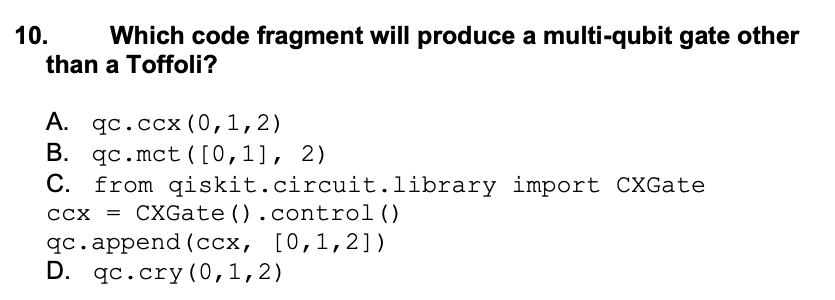

In [2]:
#Import the required packages
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister,Aer,execute
from qiskit.visualization import *


We can refer to more details here : 
- https://qiskit.org/textbook/ch-gates/multiple-qubits-entangled-states.html

Summary of quantum Operations from Qiskit Textbook
- https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html

# Let's us now consider the options

## OPTION A : ccx

- called as controlled controlled not gate
- 3-qubit gate

### Toffoli gate is a 3-qubit gate with 2 control qubits and 1 target qubit.

- first qubit and second qubit are  the controls
- Third qubit is the target qubit which flips the target qubit when the control qubits are  in state 1.



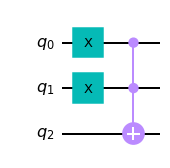

In [44]:
qc1=QuantumCircuit(3)

## also comment the 2 NOT gates on qubit 0 and 1 and check the third qubit
qc1.x(0)
qc1.x(1)
qc1.ccx(0,1,2)
qc1.draw('mpl')

In [45]:
backend=Aer.get_backend('statevector_simulator')
job=execute(qc1,backend)
result=job.result()
sv=result.get_statevector()
sv.draw(output="latex")

<IPython.core.display.Latex object>

## OPTION B : mct  called as multi-control Toffoli gate


## Another way to create a 3-qubit Toffoli gate using mct([0,1],2)

- To create mct ,we simply create with a list of control qubits and a target qubit.

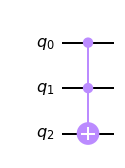

In [8]:
# We create 3-qubit mct gate
# We have a list of control qubits :0,1 and a target qubit 2.
qc2=QuantumCircuit(3)


## also comment the 2 NOT gates on qubit 0 and 1 and check the third qubit

qc2.x(0)
qc2.x(1)
qc2.mct([0,1],2)
qc2.draw('mpl')

In [10]:
backend=Aer.get_backend('statevector_simulator')
job=execute(qc2,backend)
result=job.result()
sv=result.get_statevector()
sv.draw(output="latex")

<IPython.core.display.Latex object>

## OPTION C :  CXGate

### Note: We can create a  toffoli gate using CXGate and its control() method


- More details: 
    https://qiskit.org/documentation/stable/0.24/tutorials/circuits_advanced/02_operators_overview.html
    
    
## qiskit.circuit.library.CXGate
    
    https://qiskit.org/documentation/stable/0.24/stubs/qiskit.circuit.library.CXGate.html?highlight=cxgate#qiskit.circuit.library.CXGate

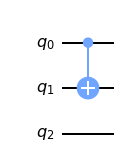

In [15]:
# We simply create a user-defined object cx from  CXGate class
# Another way of accessing a CX or NOT gate

from qiskit.circuit.library import CXGate
qc3=QuantumCircuit(3)
cx=CXGate()
qc3.append(cx,[0,1])
qc3.draw('mpl')

## Let's try to create 2 control lines
- we use the method control()

## It will create 3-qubit Toffoli gate

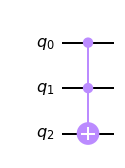

In [46]:
from qiskit.circuit.library import CXGate
qc4=QuantumCircuit(3)
ccx=CXGate().control()
qc4.append(ccx,[0,1,2])
qc4.draw('mpl')

# OPTION D : cry (controlled RY gate)

https://qiskit.org/documentation/stubs/qiskit.circuit.library.CRYGate.html

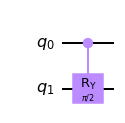

In [47]:
from math import pi

qc5=QuantumCircuit(2)
qc5.cry(pi/2,0,1)
qc5.draw('mpl')

In [48]:
backend=Aer.get_backend('statevector_simulator')
job=execute(qc5,backend)
result=job.result()
sv=result.get_statevector()
sv.draw(output="latex")

<IPython.core.display.Latex object>

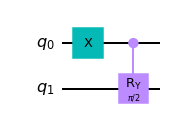

In [49]:
#Let's apply a X on the control qubit
qc6=QuantumCircuit(2)
qc6.x(0)
qc6.cry(pi/2,0,1)
qc6.draw('mpl')

In [50]:
backend=Aer.get_backend('statevector_simulator')
job=execute(qc6,backend)
result=job.result()
sv=result.get_statevector()
print("statevector:", sv)
sv.draw(output="latex")

statevector: Statevector([0.        +0.j, 0.70710678+0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


<IPython.core.display.Latex object>

# Correct Option:  D 

## Options A, B and C  creates 3-qubit Toffoli gate